In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [3]:
X=X.values
X.shape 

(3841, 187)

In [4]:
Y=Y.values
Y.shape

(3841, 1)

In [5]:
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

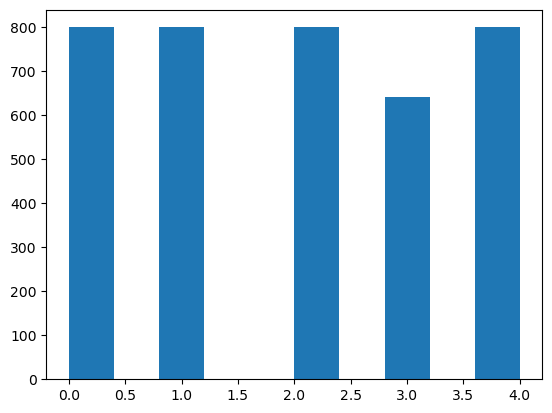

In [6]:
plt.hist(Y)

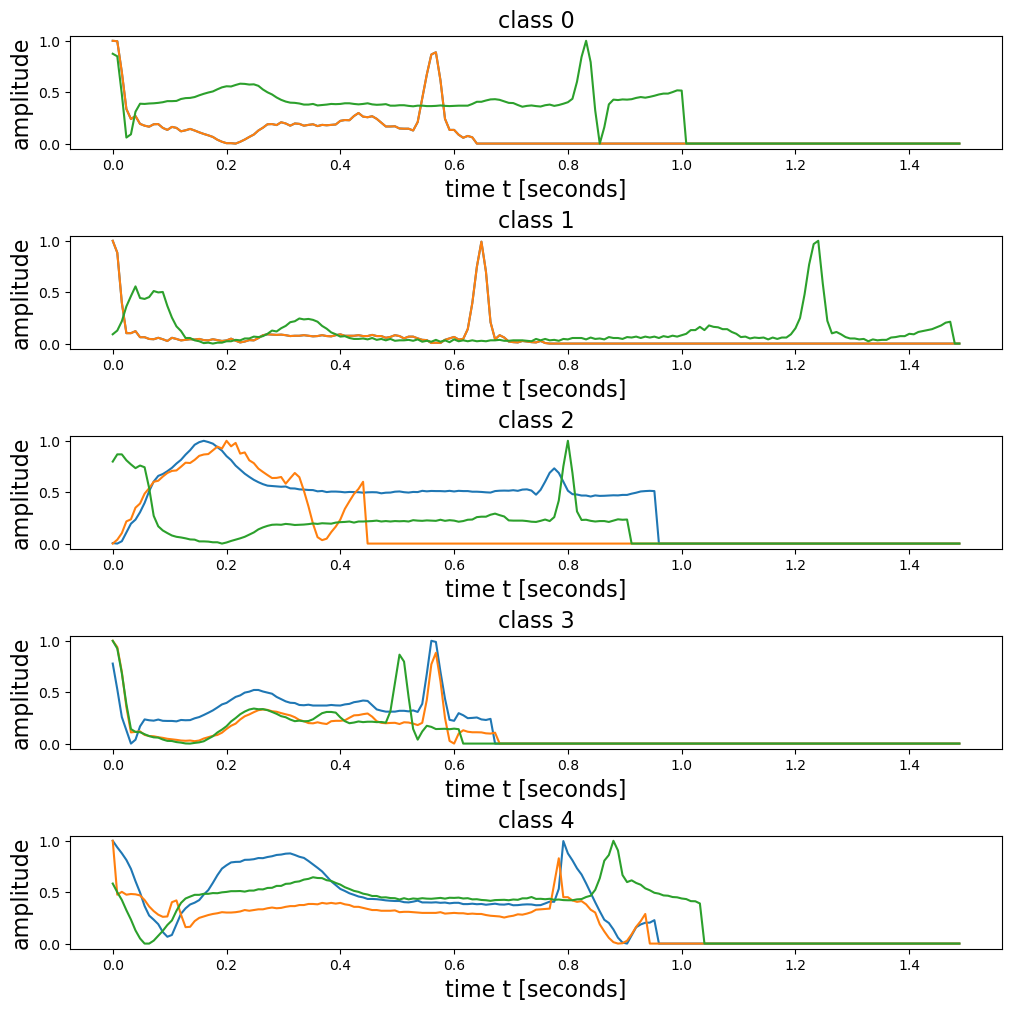

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Data Splitting for Training and Testing Sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

KNeighborsClassifier

In [9]:
n_list=np.arange(1, 100, 5)

In [10]:
param_grid = {'n_neighbors':n_list}

In [11]:
KNN = KNeighborsClassifier()
gs = GridSearchCV(estimator=KNN,
                  param_grid=param_grid,
                  scoring='accuracy', 
                  cv=5)

In [12]:
gs.fit(X_train, Y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [13]:
KNN_best = gs.best_estimator_

In [14]:
KNN_train_accuracy = KNN_best.score(X_train, Y_train)

1.0

In [15]:
KNN_test_accuracy = KNN_best.score(X_test, Y_test)

0.881664499349805

DecisionTreeClassifier

In [16]:
max_depth_list = np.arange(1, 100, 5)

In [17]:
param_grid = {'max_depth': max_depth_list}

In [18]:
DT = DecisionTreeClassifier()
gs = GridSearchCV(estimator=DT,
                  param_grid=param_grid,
                  scoring='accuracy', 
                  cv=5)

In [19]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='accuracy')

In [31]:
DT_best = gs.best_estimator_

RandomForestClassifier(max_depth=89)

In [21]:
DT_train_accuracy = DT_best.score(X_train, Y_train)

1.0

In [22]:
DT_test_accuracy = DT_best.score(X_test, Y_test)

0.8413524057217165

RandomForestClassifier

In [23]:
param_grid = {'max_depth': np.arange(1, 100, 2)}

In [24]:
RF = RandomForestClassifier()
gs = GridSearchCV(estimator=RF,
                  param_grid=param_grid,
                  scoring='accuracy', 
                  cv=5)

In [25]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             scoring='accuracy')

In [26]:
RF_best = gs.best_estimator_

In [27]:
RF_train_accuracy = RF_best.score(X_train, Y_train)

1.0

In [28]:
RF_test_accuracy = RF_best.score(X_test, Y_test)

0.9024707412223667

Pandas dataframe report for training accuracy and test accuracy

In [30]:
data = {
    '': ['training accuracy', 'test accuracy'],
    'KNeighborsClassifier': [KNN_train_accuracy, KNN_test_accuracy],
    'DecisionTreeClassifier': [DT_train_accuracy, DT_test_accuracy],
    'RandomForestClassifier': [RF_train_accuracy, RF_test_accuracy]
}

accuracy_df = pd.DataFrame(data)
accuracy_df

,,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
0,training accuracy,1.000000,1.000000,1.000000
1,test accuracy,0.881664,0.841352,0.902471
